In [7]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Import and Subset Data

<Item title:"SAC_Special_Status_Species_Observations" type:Feature Layer Collection owner:Anooshi>
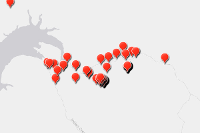

In [8]:
output = arcGIS_data_load('0bc229f00d5044cca7d9b7c94edf78be')

data = output['data0']
feature_service = output['feature_service']

In [9]:
# Subset data for desired year.
data.rename(columns={"DATE_OBS": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 34


# QAQC

In [10]:
validate_domains(feature_service)



Table/Layer:  SAC_Special_Status_Species_Observations


The following entries are not within the domain:


,Field,Data
0,Observer_C,"{Richard Graham-Bruno, ATS, Joy Stewart, ATS, Janel Mayo, ATS, Ryan Swanson, ATS}"
0,loc_descr,{Outside CE boundary near access road. Due south of SAC mouth.}


In [11]:
QAQC_whitespace(data, exclude_cols=['Additional'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SPEC_CODE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Observer_C
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: LifeStage
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Type
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SNAME
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SFPUC_Subm
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: CNDDB_Subm
No \xa0 characters found
No double spaces found
No tripl

In [12]:
find_blank_entries(data, exclude_cols=['Additional','CNAME','SFPUC_Subm','CNDDB_Subm','animal_beh', 'Long_NAD_83', 'Lat_NAD_83', 'LifeStage'])

No blank Observation_Date
No blank SHAPE
No blank Site
No blank SPEC_CODE
No blank Observer_C
No blank Type
No blank SNAME
No blank OBJECTID
No blank hab_desr
No blank loc_descr
No blank GlobalID


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


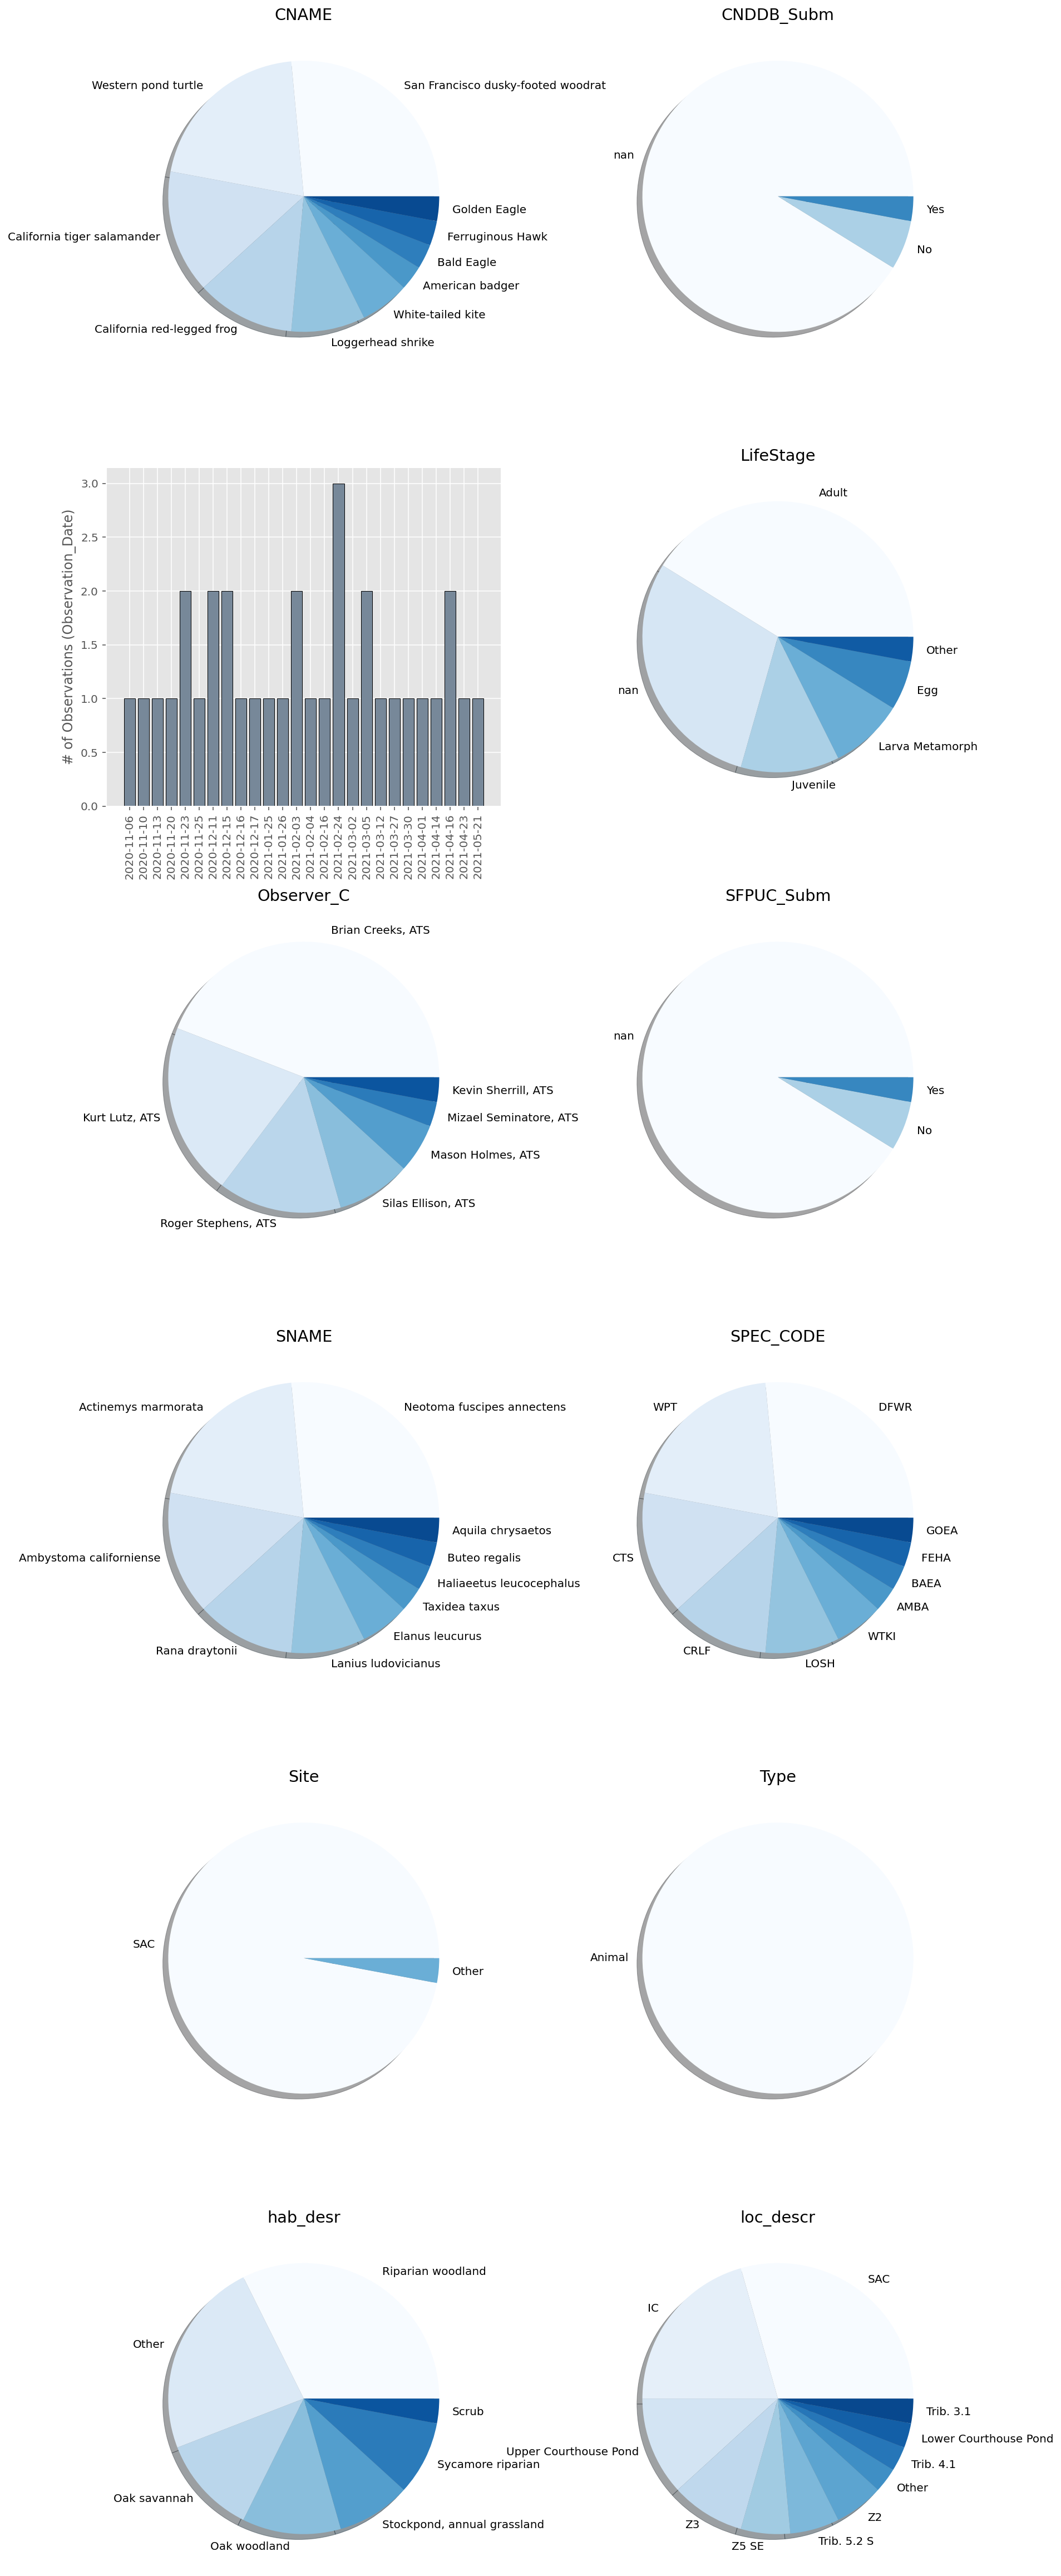

In [13]:
QAQC_plot(sub, ['CNAME', 'CNDDB_Subm', 'Observation_Date', 'LifeStage',
       'Observer_C', 'SFPUC_Subm', 'SNAME', 'SPEC_CODE',
       'Site', 'Type', 'hab_desr', 'loc_descr'])

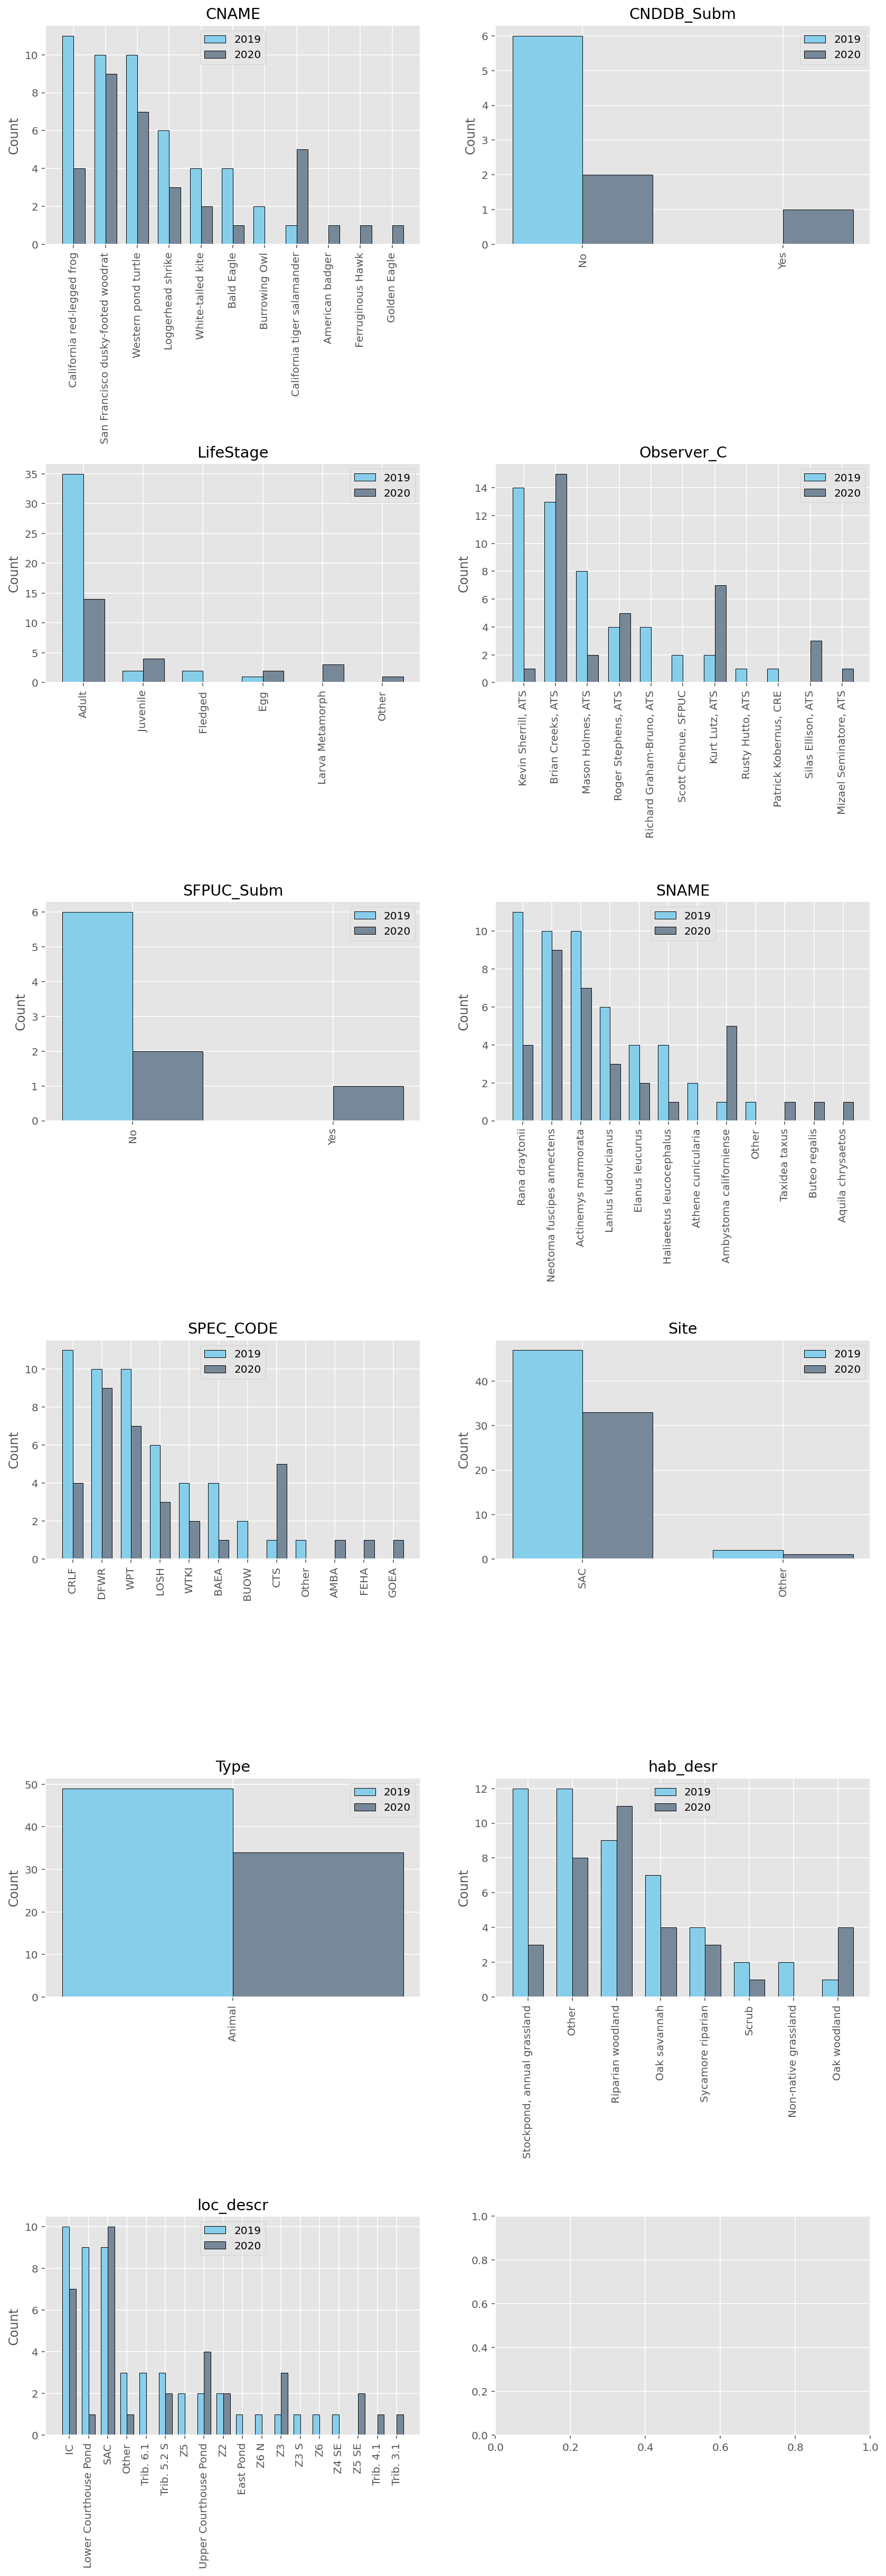

In [14]:
compare_years_catagorical(data,['CNAME', 'CNDDB_Subm', 'LifeStage',
        'Observer_C', 'SFPUC_Subm', 'SNAME', 'SPEC_CODE',
       'Site', 'Type', 'hab_desr', 'loc_descr'], '2019','2020')

Dropping surveyors with less than 1.7000000000000002 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Mizael Seminatore, ATS' 'Kevin Sherrill, ATS']


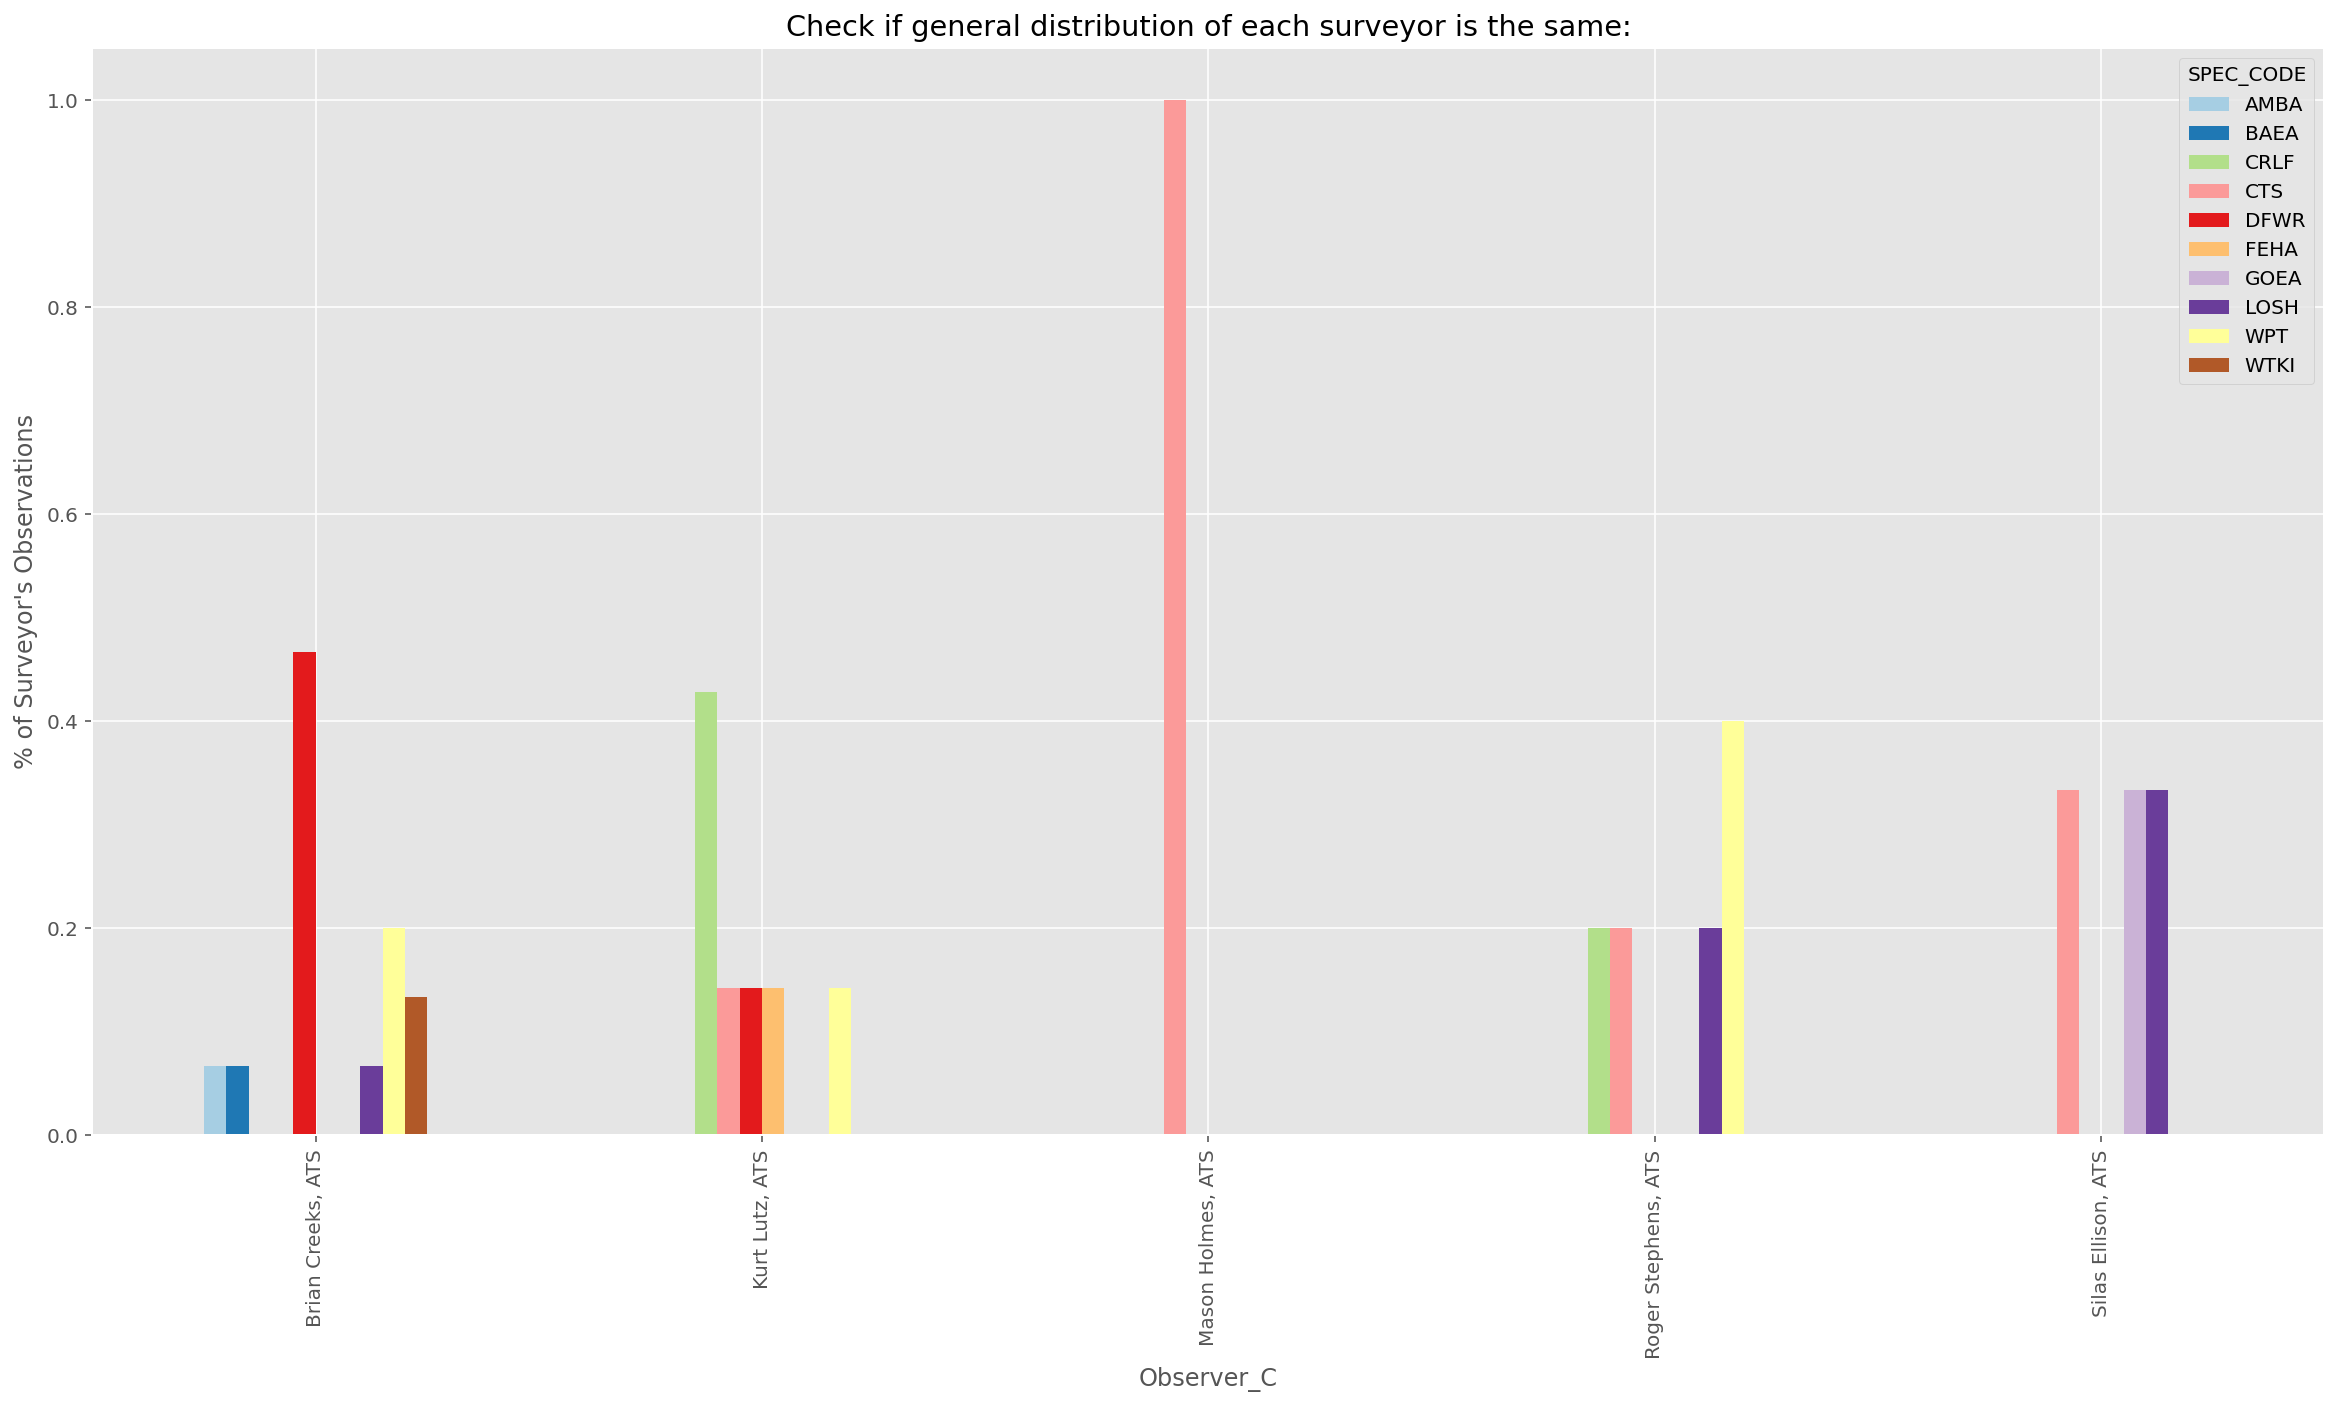

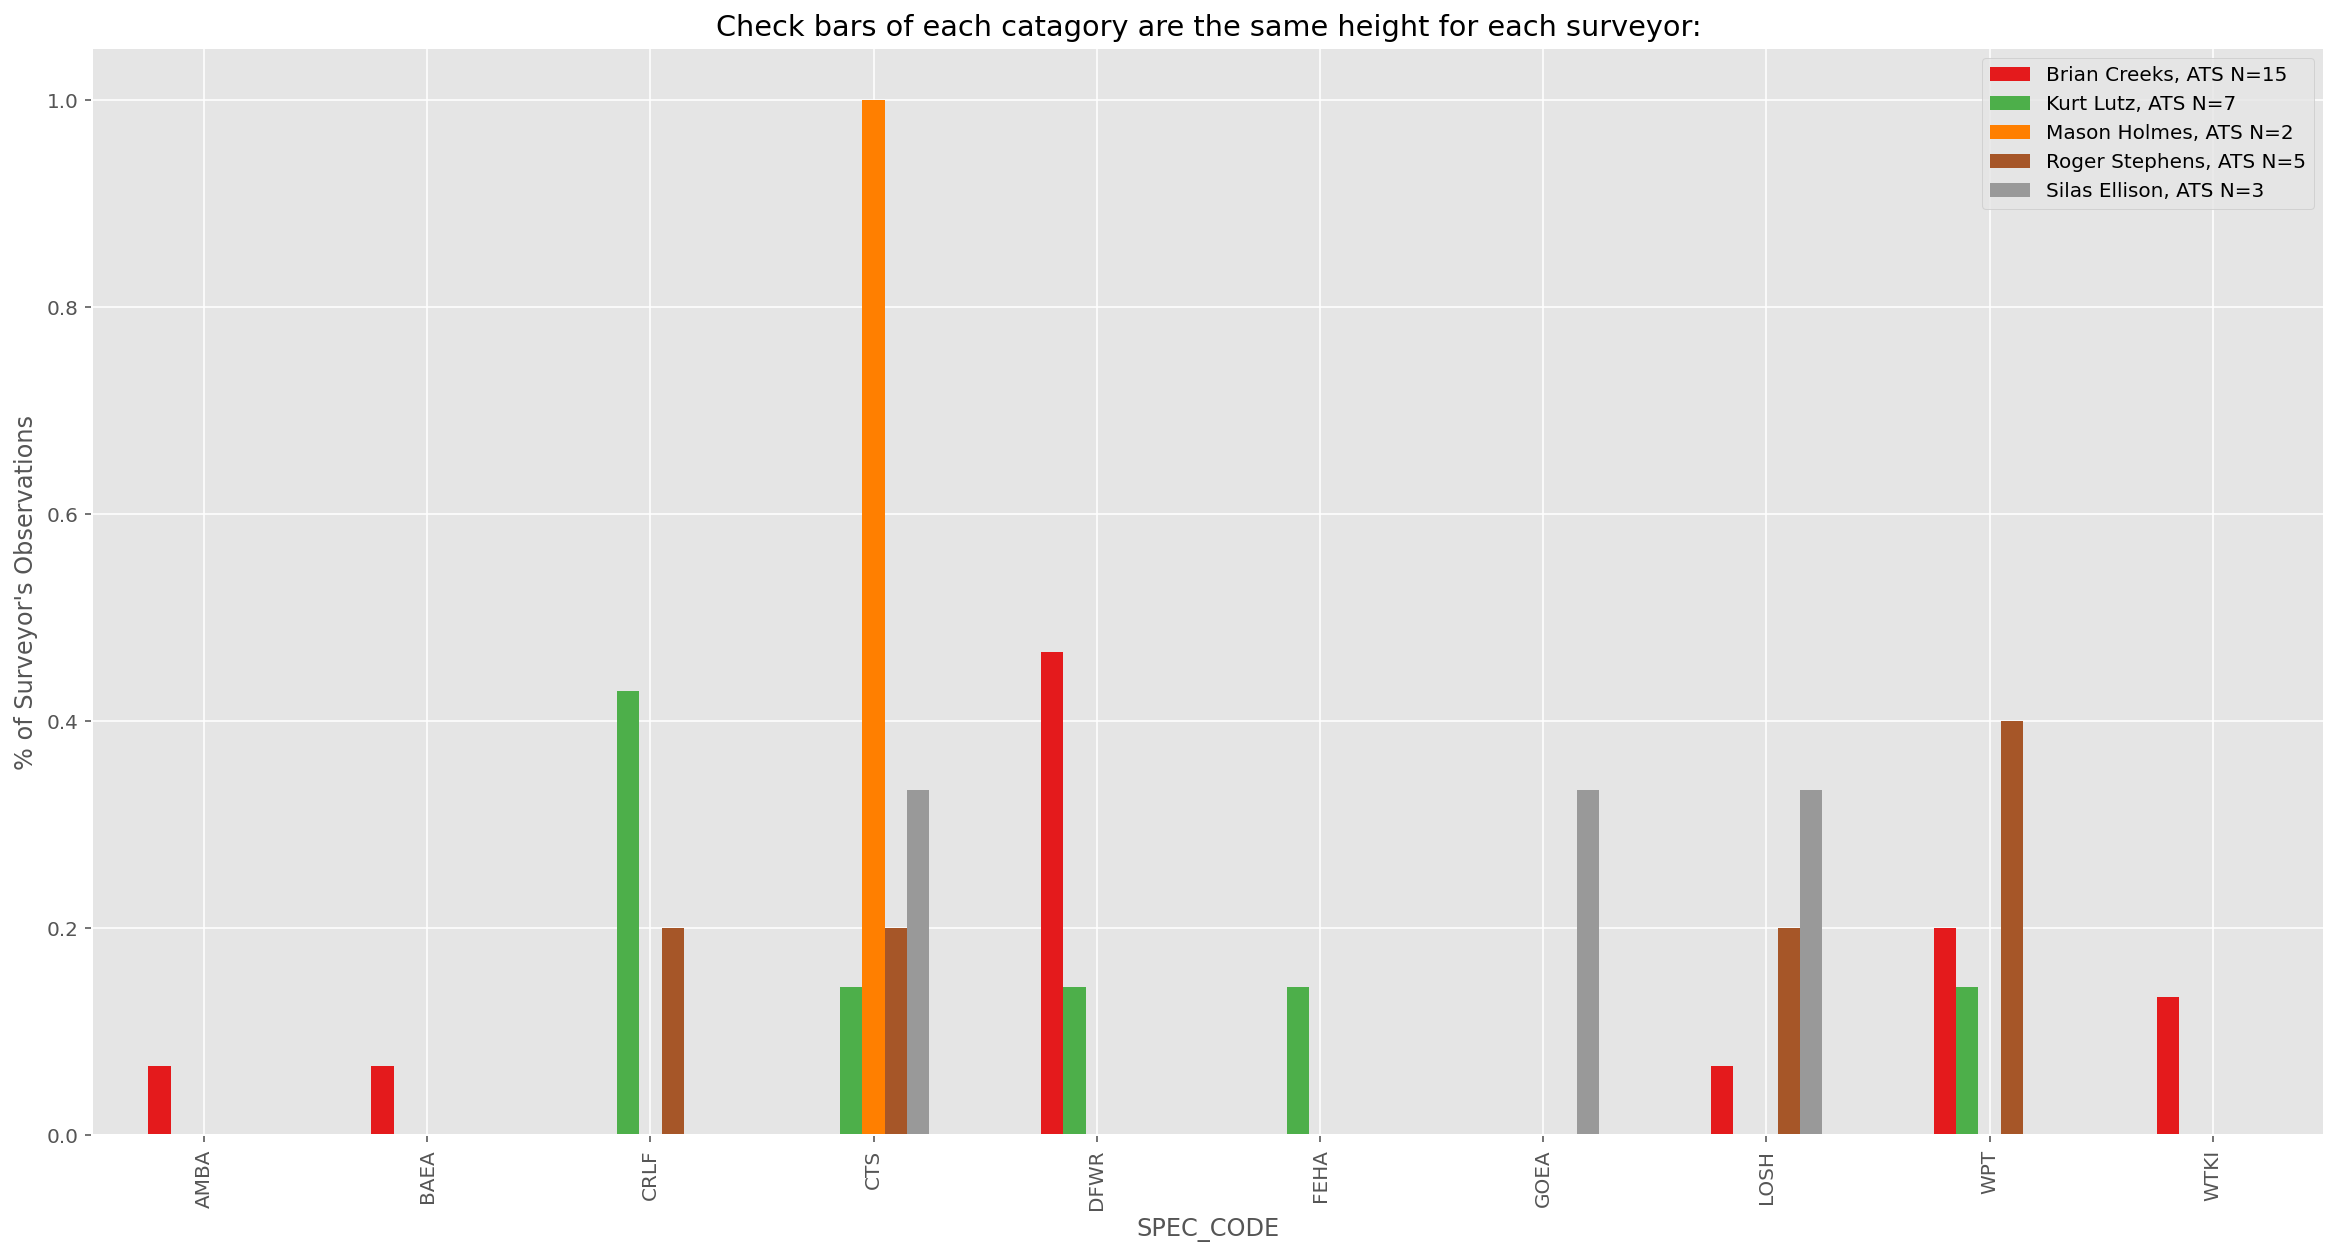

In [15]:
compare_surveyors(sub, 'SPEC_CODE', 'Observer_C', 5)

In [16]:
QAQC_attachment_filenames(feature_service)

Exception: An unknown error occurred: Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/arcgis/gis/_impl/_con/_connection.py", line 392, in get
    resp = self._session.get(url=url,
  File "/usr/local/lib/python3.8/dist-packages/requests/sessions.py", line 555, in get
    return self.request('GET', url, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/requests/sessions.py", line 542, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python3.8/dist-packages/requests/sessions.py", line 655, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/requests/adapters.py", line 439, in send
    resp = conn.urlopen(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 670, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/usr/lib/python3.8/http/client.py", line 1344, in getresponse
    response.begin()
  File "/usr/lib/python3.8/http/client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "/usr/lib/python3.8/http/client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "/usr/lib/python3.8/ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "/usr/lib/python3.8/ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
KeyboardInterrupt


In [17]:
#Additional QAQC - Check records with Species Code "Other". Manually change to appropriate species code in AGOL, if necessary.
display(data.loc[data.SPEC_CODE == 'Other'])

,OBJECTID,Type,SPEC_CODE,SNAME,CNAME,Observation_Date,Observer_C,SFPUC_Subm,CNDDB_Subm,Site,loc_descr,hab_desr,animal_beh,LifeStage,GlobalID,Additional,Lat_NAD_83,Long_NAD_83,SHAPE
189,205,Animal,Other,Other,None,2020-04-28 20:53:16,"Roger Stephens, ATS",None,None,SAC,IC,Other,Jumped into creek and tried to hide in the substrate of the slowly...,Juvenile,f39bafea-683d-485f-8ac9-c3d74a9ae7dc,"Could not confirm ID, swam away too quickly, but possible FYLF or ...",37.583545,-121.81152,"{""x"": 6181644.635823056, ""y"": 2037608.1406518072, ""spatialReferenc..."


In [18]:
#Before exporting data deliverable, Lat_NAD_83 and Long_NAD_83 may need to be generated in ArcGIS Pro.

# Export excel data deliverable

In [19]:
export = sub.drop(columns = ['SFPUC_Subm',
    'CNDDB_Subm'])

In [20]:
field_order = [
    'Site',
    'Observation_Date',
    'Observer_C',
    'Type',
    'SPEC_CODE',
    'SNAME',
    'CNAME',
    'loc_descr',
    'hab_desr',
    'animal_beh',
    'LifeStage',
    'Lat_NAD_83',
    'Long_NAD_83',
    'Additional',
    'OBJECTID',
    'GlobalID',
    'SHAPE', 
]  
       
          

In [22]:
export_data_deliverable(export, feature_service, field_order )

No Related Table Found
Exported to Outputs/SAC_Special_Status_Species_Observations_Data_20211029.xlsx
